<a href="https://colab.research.google.com/github/mudmaudo/coding-money/blob/main/rafic_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -r requirement.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirement.txt'


In [ ]:
%cd /content/drive/MyDrive/Data_Label
!unrar x "train.rar" "/content/drive/MyDrive/Data_Label/"

/content/drive/MyDrive/Data_Label

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from train.rar


Would you like to replace the existing file /content/drive/MyDrive/Data_Label/train/images/images_10_0_jpg.rf.7148df316ece8b5c2faf6799180f142a.jpg
 42586 bytes, modified on 2023-08-07 04:31
with a new one
 42586 bytes, modified on 2023-08-07 04:31

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
#version yolov8
%cd /content
!gdown --id 1dL0niKPx3ylM9qVfvRiTFb4vcsfyQ_0T
!gdown --id 1AMy69iovOLiTUwyi40PNUn1riyl7HWTP
!gdown --id 1Kn9_EBWI7Vyo-xg4ijc83xqruYgDqOyD

/content
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dL0niKPx3ylM9qVfvRiTFb4vcsfyQ_0T
To: /content/yolov8s.pt
100% 22.6M/22.6M [00:00<00:00, 40.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AMy69iovOLiTUwyi40PNUn1riyl7HWTP
To: /content/train.rar
100% 53.2M/53.2M [00:00<00:00, 66.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
# Create training yaml file
%cd /content
!rm mydataset.yaml # nếu có file thì xóa
!echo 'train: /content/drive/MyDrive/Data_Label/train/images' >> mydataset.yaml
!echo 'val: /content/drive/MyDrive/Data_Label/train/images' >> mydataset.yaml
!echo 'nc: 9' >> mydataset.yaml
!echo "names: ['light blue', 'light red', 'light yellow', 'limit 60km-h', 'no cars', 'stop', 'turn left', 'turn right', 'u turn sign']" >> mydataset.yaml


In [ ]:
%cd /content
!yolo task=detect mode=train model=yolov8n.pt data=mydataset.yaml epochs=200 imgsz=640 batch=64

/content
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=mydataset.yaml, epochs=200, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

In [ ]:
from ultralytics import YOLO
#Load file weights
path_weights = "/content/drive/MyDrive/Data_Label/runs/detect/train/weights/best.pt"
model = YOLO(f"{path_weights}")

In [ ]:
#Predict image
path_img = "/content/drive/MyDrive/Data_Label/train/images/images_10_14_jpg.rf.cf5a68ddee65d3488b5a6e6194d9020b.jpg"
results = model.predict(f"{path_img}")


image 1/1 /content/drive/MyDrive/Data_Label/train/images/images_10_14_jpg.rf.cf5a68ddee65d3488b5a6e6194d9020b.jpg: 640x640 1 light red, 392.4ms
Speed: 13.4ms preprocess, 392.4ms inference, 30.4ms postprocess per image at shape (1, 3, 640, 640)


# Check Acc and Boudingbox

In [ ]:
results = results[0]

In [ ]:
for box in results.boxes:
  class_id = results.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: light red
Coordinates: [238, 198, 276, 244]
Probability: 0.86
---


# Show Image

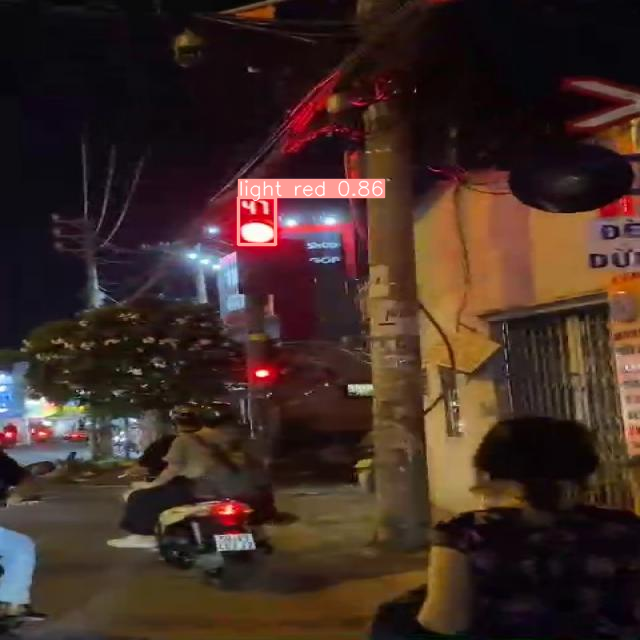

In [ ]:
from PIL import Image

Image.fromarray(results.plot()[:,:,::-1])

# Detection and Export by Video

In [ ]:
!yolo detect predict model="/content/drive/MyDrive/Data_Label/runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/Data_Label/traffic 2.mp4"


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/925) /content/drive/MyDrive/Data_Label/traffic 2.mp4: 640x384 (no detections), 416.0ms
video 1/1 (2/925) /content/drive/MyDrive/Data_Label/traffic 2.mp4: 640x384 (no detections), 248.5ms
video 1/1 (3/925) /content/drive/MyDrive/Data_Label/traffic 2.mp4: 640x384 (no detections), 235.4ms
video 1/1 (4/925) /content/drive/MyDrive/Data_Label/traffic 2.mp4: 640x384 1 light blue, 230.2ms
video 1/1 (5/925) /content/drive/MyDrive/Data_Label/traffic 2.mp4: 640x384 1 light blue, 217.4ms
video 1/1 (6/925) /content/drive/MyDrive/Data_Label/traffic 2.mp4: 640x384 1 light blue, 246.7ms
video 1/1 (7/925) /content/drive/MyDrive/Data_Label/traffic 2.mp4: 640x384 1 light blue, 221.4ms
video 1/1 (8/925) /content/drive/MyDrive/Data_Label/traffic 2.mp4: 640x384 1 light blue, 231.8ms
video 1/1 (9/925) /content/drive/MyDrive/Data_Labe